<a href="https://colab.research.google.com/github/leedabin2/regression/blob/main/%EA%B0%80%EC%84%A41__%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stargazer
from stargazer.stargazer import Stargazer 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
def residplot(resid):
    plt.figure(figsize=(20,5))
    plt.scatter(range(0,len(resid)),resid, s=0.1)
    plt.axhline()
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# [문제 1] 가계소득이 높을수록 가계지출에서 의식주와 관련된 비용(식료품비, 의류비, 주거광렬비 등)이 차지하는 비중이 높아진다는 가설을 회귀분석을 이용하여 검증하라. 

**1. 회귀식 설명**

종속변수 - 가계지출에서 의식주와 관련된 비용의 비중

독립변수 - 가계 소득

통제변수 - 가구원 수, 노령화 인구 증가, 1인 가구 증가, 주거의 규모

In [ ]:
df= pd.read_csv('drive/MyDrive/data/가계동향조사-2010-2021.csv')

df['의식주비율'] = (df['가계지출_소비지출_식료품비주류음료구입비'] / df['가계지출_소비지출금액']) + (df['가계지출_소비지출_주거수도광열비'] / df['가계지출_소비지출금액'] ) + (df['가계지출_소비지출_의류신발구입비'] / df['가계지출_소비지출금액'] )
f1 = df['의식주비율'] > 0 


# 분위별 평균 소득 (범주별 연산)
df['소득분위'] = pd.qcut(df['소득'], q = 5, labels = False)
df.groupby('소득분위')[['소득']].mean()

df = df.loc[f1,['조사연도','가구원수','노인가구여부','거처구분코드','세대구분코드','가구주_연령','가구주_학력코드','소득','소득분위','의식주비율']]
df.columns=['year','n_mb','old','abode','generation','age','edu','income','income_r','ratio']

df.income = df.income / 1e6

df.sample(10)

,year,n_mb,old,abode,generation,age,edu,income,income_r,ratio
48208,2021,3,0,아파트,2.0,60,고등,2.410487,1,0.480233
74528,2010,2,0,단독-다가구주택,1.0,55,고등,1.346149,0,0.508735
16401,2019,1,0,아파트,1.0,62,중학,0.000000,0,0.538107
55238,2021,3,0,단독-다가구주택,2.0,64,고등,7.474701,4,0.311522
82935,2015,1,0,단독-다가구주택,1.0,55,중학,1.466002,1,0.544776
86053,2015,3,0,단독-다가구주택,2.0,47,고등,2.372121,1,0.471973
51797,2021,1,1,단독-다가구주택,1.0,76,초등,0.719590,0,0.778513
73849,2010,4,0,단독-다가구주택,2.0,41,고등,2.990451,2,0.295316
9006,2019,1,0,단독-다가구주택,1.0,28,대학2,2.266667,1,0.522431
56624,2021,2,0,아파트,1.0,64,중학,5.426484,3,0.383539


# 회귀분석 수행 

더미변수 생성

In [ ]:
dummy = pd.get_dummies(df['income_r']) # 회귀분석 결과의 왜곡을 막기위해 범주형변수를 더미변수로 변환
dummy.columns = ['소득1', '소득2', '소득3', '소득4', '소득5']
dummy

,소득1,소득2,소득3,소득4,소득5
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
92601,0,1,0,0,0
92602,0,0,1,0,0
92603,0,1,0,0,0
92604,0,0,0,0,1


In [ ]:
df = pd.concat([df, dummy], axis=1)
df

,year,n_mb,old,abode,generation,age,edu,income,income_r,ratio,소득1,소득2,소득3,소득4,소득5
0,2019,1,0,단독-다가구주택,1.0,64,대학4,0.425000,0,0.573508,1,0,0,0,0
1,2019,3,0,단독-다가구주택,2.0,63,고등,2.682647,2,0.397202,0,0,1,0,0
2,2019,1,0,단독-다가구주택,1.0,58,대학4,0.000000,0,0.475456,1,0,0,0,0
3,2019,3,0,단독-다가구주택,2.0,29,대학4,3.702933,2,0.297947,0,0,1,0,0
4,2019,2,0,단독-다가구주택,2.0,58,중학,2.050000,1,0.136274,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92601,2015,1,0,단독-다가구주택,1.0,29,대학4,2.388729,1,0.207880,0,1,0,0,0
92602,2015,1,0,아파트,1.0,45,대학4,3.885620,2,0.323097,0,0,1,0,0
92603,2015,1,1,아파트,1.0,74,고등,1.947161,1,0.869931,0,1,0,0,0
92604,2015,4,0,아파트,2.0,53,고등,7.385646,4,0.248757,0,0,0,0,1


In [ ]:
from statsmodels.formula.api import ols
m1 = ols("ratio ~ C(income_r)" ,df).fit() 

print(m1.summary())

# F-statistic : 5743로 유의하다. 따라서 귀무가설(가계소득이 가계지출에서의 식품비율에 영향을 미치지 못한다.)는 기각될 수 있다. 
# 소득 수준이 가장 낮을 때 의식주 지출 비율은 0.5053이 된다.
# 소득분위가 높을수록 식품비율의 비중이 낮아지고 있다.
# r-squared은 0.119로 독립변수들이 종속변수인 의식주비율을 약 19.9%로 설명하고 있다. 나머지 80%는 u의 변동으로 설명한다.
# Skew : 0.311로 잔차 분포가 약간 오른쪽으로 치우쳐져 있다.

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     5743.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:50:44   Log-Likelihood:                 47943.
No. Observations:               92606   AIC:                        -9.588e+04
Df Residuals:                   92601   BIC:                        -9.583e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5053      0.001  

로그변환

In [ ]:
f = (df['ratio'] == 1) | (df['ratio'] == 0) # 비율이 0 혹은 1인 경우
smp = df.loc[~f,:] # 해당 경우를 제외하고 smp에 저장

import numpy as np
from scipy.special import logit
smp['ratio_log'] = np.log(smp['ratio']) # 로그변환
#smp['ratio_logit'] = logit(smp['의식주비율']) # logit 변환

m1_l = ols('np.log(ratio) ~ C(income_r)',df).fit()
print(m1_l.summary())

# 1분위는 가장 소득이 낮은 분위에 비해서 가계지출에서의 의식주비율이 약 17만원 낮다.
# 소득이 높아질수록 의식주비율의 비중은 낮아지고 있다. 
# r-squared : 독립변수들이 종속변수 의식주비율 변동성의 15.2%만을 설명한다. 
# 변환된 변수들이 설명하지 못하는 비선형적인 관계가 있다.
# F-statistic : 4151이고, 유의확률도 0.05보다 작다. 따라서 가계소득과 의식주비율 간의 관계는 통계적으로 유의미하다.
# Skew : 잔차 분포가 왼쪽으로 치우쳐 있다. 의식주비율의 비중이 낮은 가구주가 상당히 많음을 알 수 있다.

                            OLS Regression Results                            
Dep. Variable:          np.log(ratio)   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     4151.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:55:23   Log-Likelihood:                -53169.
No. Observations:               92606   AIC:                         1.063e+05
Df Residuals:                   92601   BIC:                         1.064e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7626      0.003  

잔차의 관찰 - 로그변환

In [ ]:
resid = pd.DataFrame({'x':df['income_r'], 'resid':m1_l.resid})
resid

,x,resid
0,0,0.206658
1,2,0.159686
2,0,0.019161
3,2,-0.127842
4,1,-1.055060
...,...,...
92601,1,-0.632767
92602,2,-0.046804
92603,1,0.798686
92604,4,-0.109834


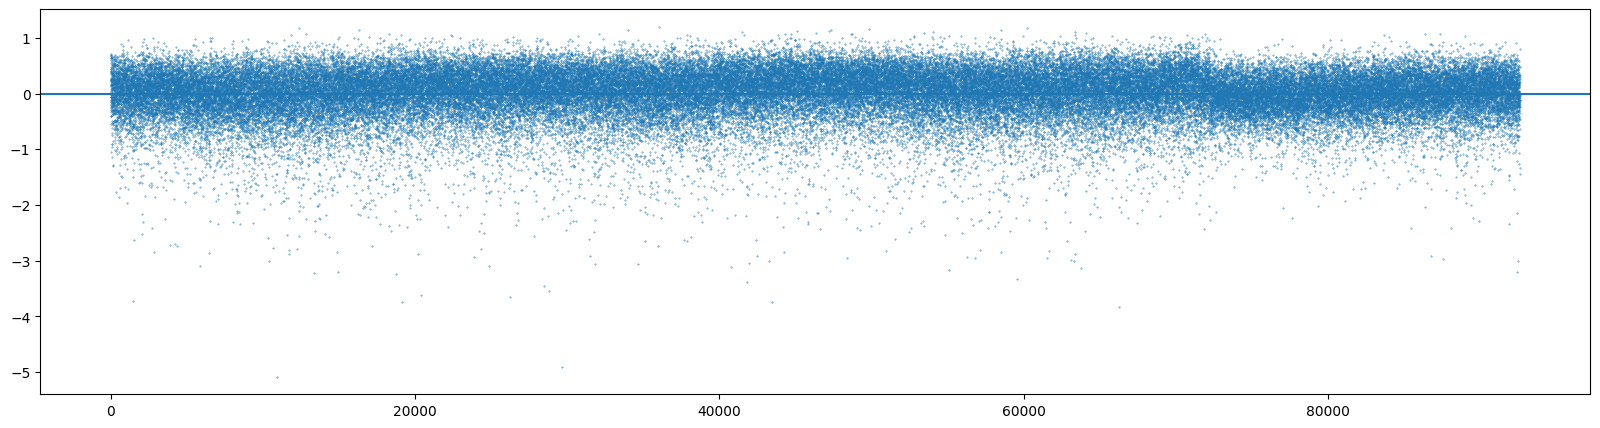

In [ ]:
residplot(resid['resid'])

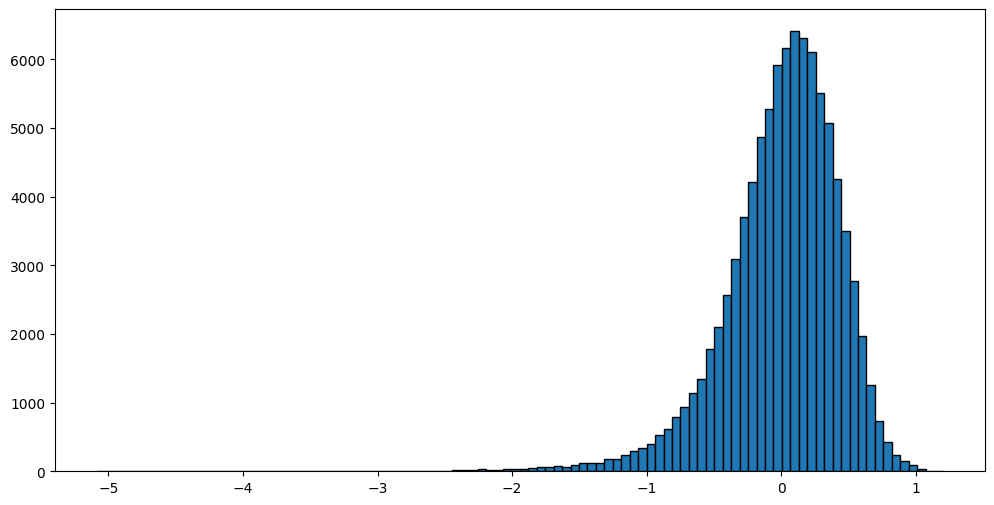

In [ ]:
resid['resid'].hist(figsize=(12,6), bins=100, grid=False, edgecolor='black');
# 정규성이 로그를 변환했음에도 낮다.

계층적 회귀 분석

통제변수 검토

In [ ]:
# 가구원 수 
df.groupby('n_mb')['ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
n_mb,,,,,,,,
1,24857.0,0.445814,0.189626,0.001914,0.301914,0.435199,0.577383,1.000000
2,31687.0,0.408102,0.158049,0.008751,0.295203,0.396618,0.512643,0.974062
3,17595.0,0.340810,0.124361,0.012074,0.254972,0.328982,0.413565,0.930493
4,14518.0,0.310065,0.104633,0.009238,0.239566,0.299233,0.370007,0.829037
5,3337.0,0.310018,0.102077,0.027135,0.242594,0.300547,0.365702,0.776949
6,517.0,0.335587,0.109070,0.038792,0.252061,0.320904,0.404662,0.780955
7,78.0,0.346340,0.088585,0.160862,0.275430,0.342797,0.418197,0.573188
8,14.0,0.330350,0.136800,0.101557,0.253946,0.329191,0.408063,0.557927
9,3.0,0.308862,0.033807,0.271187,0.295017,0.318848,0.327699,0.336550


In [ ]:
# 노인 가구 여부
df.groupby('old')['ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
old,,,,,,,,
0,73956.0,0.353767,0.137747,0.001914,0.256648,0.337991,0.436612,0.965102
1,18650.0,0.514135,0.181833,0.011147,0.387232,0.515903,0.644564,1.000000


In [ ]:
# 1인 가구 
df['single'] = ['single' if n == 1 else 'not single' for n in df['n_mb']]
df_single = df[df['n_mb'] == 1]
df_single.groupby('single')['ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
single,,,,,,,,
single,24857.0,0.445814,0.189626,0.001914,0.301914,0.435199,0.577383,1.0


In [ ]:
# 거처 구분 코드
df.groupby('abode')['ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
abode,,,,,,,,
기타,49.0,0.344551,0.152005,0.107062,0.218416,0.330976,0.424347,0.645370
다세대주택,6270.0,0.362671,0.155321,0.007344,0.250796,0.339499,0.453059,1.000000
단독-다가구주택,35460.0,0.415990,0.170389,0.001914,0.292231,0.399532,0.526651,1.000000
비거주용건물,695.0,0.418824,0.167116,0.053312,0.296253,0.404860,0.516960,0.966974
아파트,43593.0,0.366058,0.150526,0.003472,0.260022,0.341549,0.449957,0.991691
연립주택,5288.0,0.373318,0.155306,0.013655,0.262020,0.349417,0.464095,0.981524
오피스텔,1251.0,0.389482,0.160257,0.034502,0.269974,0.378469,0.499023,0.938599


In [ ]:
import numpy as np

m1 = ols('np.log(ratio) ~ C(income_r)',df).fit() # 소득에 따른 식품비율의 차이
m2 = ols('np.log(ratio) ~ C(income_r) + C(n_mb)',df).fit() # 단계적으로 통제변수를 추가하여 차이를 살펴봄
m3 = ols('np.log(ratio) ~ C(income_r)  + C(old) + C(n_mb)',df).fit()
m4 = ols('np.log(ratio) ~ C(income_r)  + C(single) + C(old) + C(n_mb)',df).fit()
m5 = ols('np.log(ratio) ~ C(income_r)  + C(abode) + C(single) + C(old) + C(n_mb)',df).fit()

out = Stargazer([m1, m2, m3, m4, m5])
out

# (1) 소득분위가 0분위인 기준에 비해서 1분위의 소득을 버는 사람들은 의식주비율의 비중이 17% 낮다.
# (2) 가구원수의 변수를 통제하니 더욱 비중의 차이가 조금 감소하고 있다.
# (3) 노인가구의 여부와 가구원 수, 모두 통제하니 의식주비율의 비중이 차이가 더욱 줄어들고 있다.
# (4) 1인가구는 아닌 가구에 비해서 9%정도 가계지출에서 차지하는 의식주비율이 낮다.
# (5) 전체적으로 통제변수들을 모두 통제했을 때, 식품비율의 비중이 낮아지는 것을 확인할 수 있다.
# 결론적으로 노인가구의 여부와 가구원 수에 따라서 소득분위가 높은 가구와 낮은 가구 사이에서의 지출에서 차지하는 식품비용의 비중 차이가 줄어드는 것을 확인할 수 있다.
# 변수가 누락 되어있을 때(노인가구의 여부, 가구원 수 통제변수의 누락)는 과대 추정(혹은 과소 추정/ 여기서는 과대 추정)이 되고 있다.

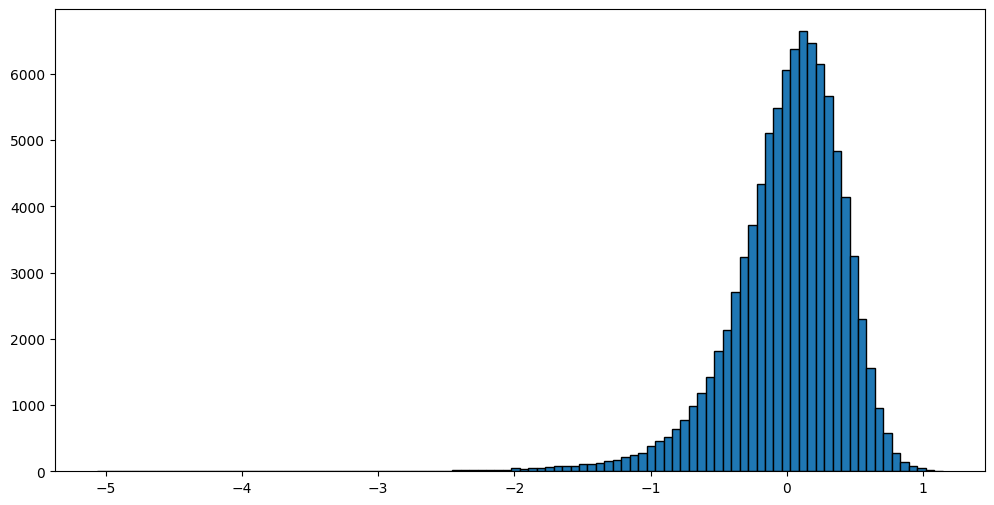

In [ ]:
m5.resid.hist(bins=100, figsize=(12,6), grid=False, edgecolor='black');

극단치 제거

In [ ]:
f1 = df['ratio'] > df['ratio'].quantile(0.01)
f2 = df['ratio'] < df['ratio'].quantile(0.99)
smp = df.loc[f1 & f2,:]

In [ ]:
m1 = ols('np.log(ratio) ~ C(old) + C(n_mb) + C(single) + C(abode)',smp).fit()
m2 = ols('np.log(ratio) ~ C(income_r) + C(n_mb) + C(single) + C(abode)',smp).fit()
m3 = ols('np.log(ratio) ~ C(old) + C(income_r) + C(n_mb) + C(single) + C(abode)',smp).fit()
m4 = ols('np.log(ratio) ~ C(old)*C(income_r) + C(n_mb) + C(single) + C(abode)',smp).fit()
out = Stargazer([m1, m2, m3, m4])
out

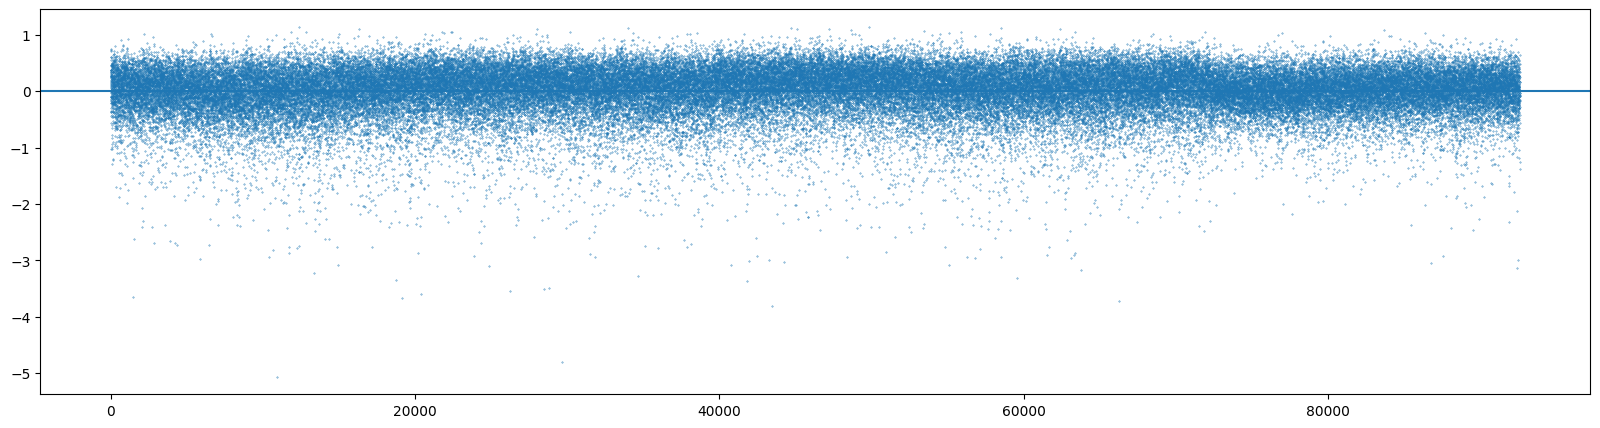

In [ ]:
residplot(m5.resid)

<Axes: >

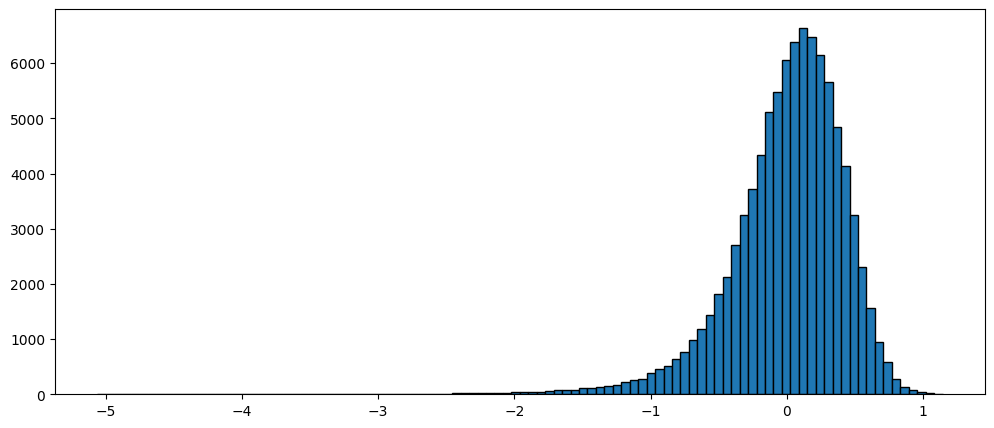

In [ ]:
# 극단치 제거로 대칭성을 강화
m5.resid.hist(bins=100, figsize=(12,5), edgecolor='black', grid=False)
# 종속변수에 영향을 줄 것 같은 변수들을 투입했을 때 내가 설정한 가설을 의미있게 설명할 수 있다.

결론 : 독립변수 가계소득이 높을수록 가계지출에서 차지하는 식품의 비율은 낮아지는 것을 확인할 수 있었다. 다만, 노인가구의 여부와 거처와 같은 통제변수를 투입했을 때 소득분위가 낮은 가구들은 소득분위가 높은 가구에 비해서 차지하는 식품의 비율의 갭차이가 줄어드는 것을 확인할 수 있었다. 